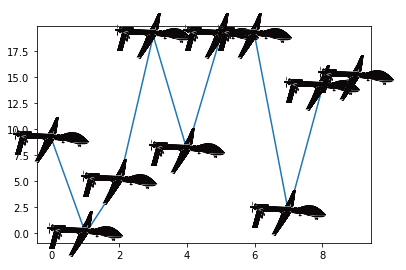

In [19]:
#There are two ways to do this.

#Plot the image using imshow with the extent kwarg set based on the location you want the image at.
#Use an OffsetImage inside an AnnotationBbox.
#The first way is the easiest to understand, but the second has a large advantage. The annotation box approach will allow the image to stay at a constant size as you zoom in. Using imshow will tie the size of the image to the data coordinates of the plot.

#Here's an example of the second option:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from numpy import random

def main():
#   x = np.linspace(0, 6, 10)
    x  = list(range(0, 10))
    y = random.randint(20, size=(10))
    image_path = get_sample_data('u1.png')
    fig, ax = plt.subplots()
    imscatter(x, y, image_path, zoom=0.2, ax=ax)
    ax.plot(x, y)
    plt.show()
    


    return 

main()

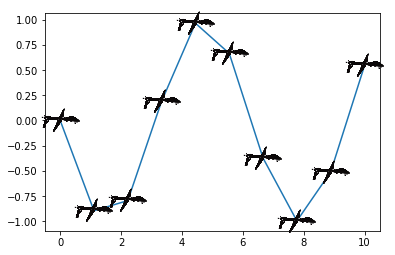

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def main():
    x = np.linspace(0, 10, 10)
    y = np.sin(x)
    y = -y
    image_path = get_sample_data('u1.png')
    fig, ax = plt.subplots()
    imscatter(x, y, image_path, zoom=0.1, ax=ax)
    ax.plot(x, y)
    plt.show()

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()

In [21]:
from numpy import random

x=random.randint(100, size=(5))

print(x)

[29 65 65 44 22]


In [22]:
x = list(range(1, 10))
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [23]:
import random
    
def point_on_triangle(pt1, pt2, pt3):
    """
    Random point on the triangle with vertices pt1, pt2 and pt3.
    """
    x, y = sorted([random.random(), random.random()])
    s, t, u = x, y - x, 1 - y
    return (s * pt1[0] + t * pt2[0] + u * pt3[0],
            s * pt1[1] + t * pt2[1] + u * pt3[1])

In [24]:
def point_on_triangle2(pt1, pt2, pt3):
    """
    Random point on the triangle with vertices pt1, pt2 and pt3.
    """
    # x, y = random.random(), random.random()
    x, y = random.uniform(0,1, size=(0,4)), random.uniform(-10,5, size=(0,4))
#    np.random.uniform(-10,5, size=(4,3))
    q = abs(x - y)
    s, t, u = q, 0.5 * (x + y - q), 1 - 0.5 * (q + x + y)
    return (
        s * pt1[0] + t * pt2[0] + u * pt3[0],
        s * pt1[1] + t * pt2[1] + u * pt3[1],
    )

In [25]:
pt1 = (1, 1)
pt2 = (4, 4)
pt3 = (4, 1)
points = [point_on_triangle(pt1, pt2, pt3) for _ in range(10)]
points1 = [point_on_triangle(pt1, pt2, pt3) for _ in range(2000)]

In [26]:
points

[(3.834272083608464, 1.1740799912963111),
 (2.8374403773396897, 1.1062708245138493),
 (1.1994312240202467, 1.0064098667936738),
 (3.3152926518912365, 2.3616786666960947),
 (3.9641343791380717, 2.711722408716858),
 (2.01788147359606, 1.7680253497737723),
 (3.559140344422569, 2.482168188820135),
 (2.2818050176430513, 1.329853939583144),
 (3.9249235947547665, 1.5231271571296214),
 (3.653423443966289, 2.268032972685001)]

In [27]:
import pandas as pd

df = pd.DataFrame(points) 
    
# saving the dataframe 
df.to_csv('r-cluster.csv') 

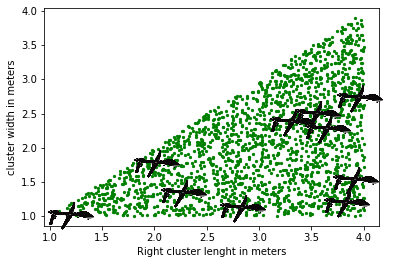

In [28]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
x, y = zip(*points)
x1, y1 = zip(*points1)
image_path = get_sample_data('u1.png')
image_path1 = get_sample_data('u1.png')
#plt.scatter(x, y,image_path, s=1)
imscatter(x, y, image_path, zoom=0.12)
#imscatter(x, y, image_path1, zoom=0.12)
fig = plt.scatter(x1, y1, s=5, color ='Green' )
plt.xlabel('Right cluster lenght in meters')
plt.ylabel('cluster width in meters')
#plt.title('UAV formation')
plt.savefig("out5.png")
plt.show()

In [214]:
pt1 = (1, 1)
pt2 = (1, 4)
pt3 = (5, 2.5)

# second triangular formation 

pt1_1 = (3, 1.75)
pt2_1 = (3, 3.25)
pt3_1 = (5, 2.5)

points = [point_on_triangle(pt1, pt2, pt3) for _ in range(3)]
points1 = [point_on_triangle(pt1, pt2, pt3) for _ in range(2000)]

#second formation 
points2 = [point_on_triangle(pt1_1, pt2_1, pt3_1) for _ in range(3)] 
# second doted triangle 
points12 = [point_on_triangle(pt1_1, pt2_1, pt3_1) for _ in range(200)]

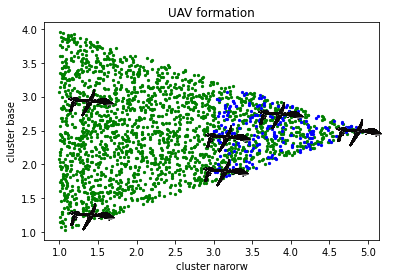

In [215]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

#first formation 
x, y = zip(*points)
x1, y1 = zip(*points1)

#second formation 
x2, y2 = zip(*points2)
x12, y12 = zip(*points12)

image_path = get_sample_data('u1.png')
imscatter(x, y, image_path, zoom=0.12)


image_path1 = get_sample_data('u1.png')
imscatter(x2, y2, image_path1, zoom=0.12)


#for first formation 
plt.scatter(x1, y1, s=5, color ='Green' )
# for second 
plt.scatter(x12, y12, s=5, color ='Blue')


plt.xlabel('cluster narorw')
plt.ylabel('cluster base')
plt.title('UAV formation')
plt.show()

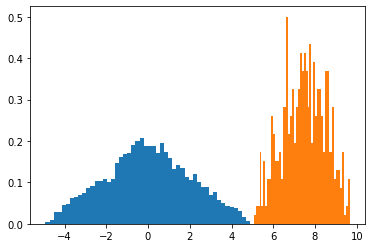

In [193]:
# import numpy
import numpy as np
import matplotlib.pyplot as plt
  
# Using triangular() method
gfg = np.random.triangular(-5, 0, 5, 5000)
gfg1 = np.random.triangular(5, 7.5, 10, 500)
  
plt.hist(gfg, bins = 50, density = True)
plt.hist(gfg1, bins = 50, density = True)
plt.show()

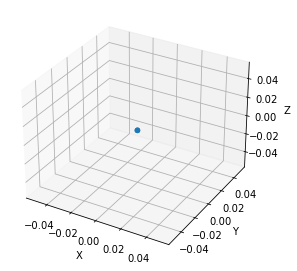

In [391]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # appropriate import to draw 3d polygons
from matplotlib import style

plt.figure('SPLTV',figsize=(10,5))
custom=plt.subplot(121,projection='3d')
#x-2y+z=6
x1=np.array([0, 0, 0])
y1=np.array([0, 0, 0])
z1=np.array([0, 0, 0])  # z1 should have 3 coordinates, right?
custom.scatter(x1,y1,z1)

# 1. create vertices from points
verts = [list(zip(x1, y1, z1))]
# 2. create 3d polygons and specify parameters
srf = Poly3DCollection(verts, alpha=0, facecolor='#800000')
# 3. add polygon to the figure (current axes)
plt.gca().add_collection3d(srf)

custom.set_xlabel('X')
custom.set_ylabel('Y')
custom.set_zlabel('Z')
plt.show()